In [63]:
import bz2
import json
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["figure.figsize"] = (10,10)

In [66]:
def load_data(year, month):
    """
    returns: list
        list of dictionaries, where each dictionary contains data about one comment
    """
    if month < 10:
        month = "0"+str(month)
    
    filename = f"./reddit_data/{year}/RC_{year}-{month}.bz2"
    with bz2.open(filename, "rt") as f:
        return [json.loads(x) for x in f.read().split("\n")[:-1]] # last line is and empty line

In [94]:
def clean_data(data):
    for el in data:
        el["link_id"] = el["link_id"][3:] # eliminate tx_ part of the id
        if el["parent_id"][:3] == "t1_":
            el["parent_id"] = el["parent_id"][3:]
    return data 

In [84]:
# general stats

def get_nr_subreddits(data):
    return np.unique([x["subreddit_id"] for x in data]).shape[0]

def get_nr_commenters(data):
    # including the [deleted] users
    return np.unique([x["author"] for x in data]).shape[0]

def get_nr_posts(data):
    return np.unique([x["link_id"] for x in data]).shape[0]

In [132]:
# helper functions 

def transform_to_dict(data, field):
    d = dict()
    for el in data:
        temp = d.get(el[field], [])
        temp.append(el)
        d[el[field]] = temp
        
    return d

def get_field_av(d):
    count = 0
    nr = 0
    for el in d.values():
        count += len(el)
        nr += 1
    return count / nr

def get_distribution(d):
    lst = []
    for el in d.values():
        lst.append(len(el))
    return lst

In [129]:
# post stats 

def transform_to_post_dict(data):
    return transform_to_dict(data, "link_id")

def get_av_comment_count_on_post(post_dict):
    """Gets the average nr of post count for posts that have at least one comment
    """
    return get_field_av(post_dict)

def get_post_comment_distribution(post_dict):
    return get_distribution(post_dict)

In [131]:
# author stats 

def transform_to_author_dict(data):
    return transform_to_dict(data, "author")

def get_av_comment_count_by_author(author_dict):
    return get_field_av(author_dict)

def get_author_comment_distribution(author_dict):
    return get_distribution(author_dict)


2
791
3.125319693094629
3.510126582278481
max post:  145
max author:  42


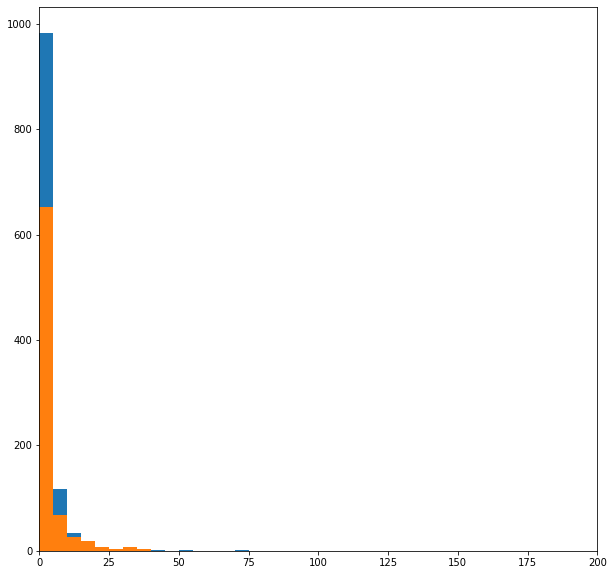

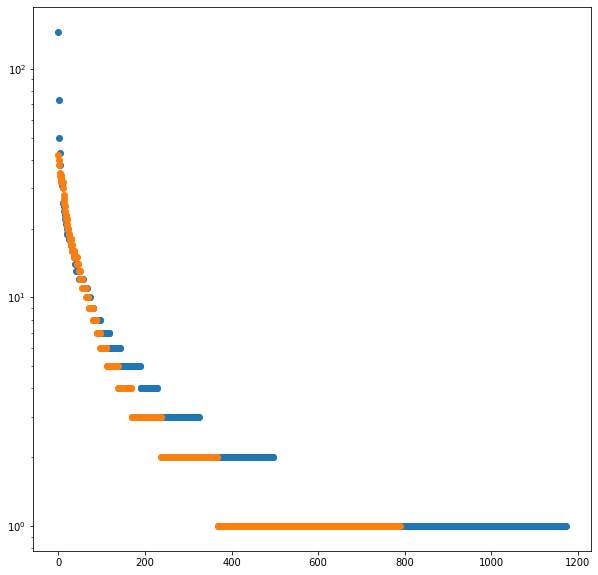

In [143]:
def quick_summary(year, month):
    data = load_data(year, month)
    data = clean_data(data)
    nr_subreddits = get_nr_subreddits(data)
    nr_commenters = get_nr_commenters(data)
    nr_posts = get_nr_posts(data)
    
    post_dict = transform_to_post_dict(data)
    av_comment_count = get_av_comment_count_on_post(post_dict)
    post_distribution = get_post_comment_distribution(post_dict)
    
    author_dict = transform_to_author_dict(data)
    del author_dict["[deleted]"]
    av_author_comments = get_av_comment_count_by_author(author_dict)
    author_distribution = get_author_comment_distribution(author_dict)

    
    print("nr unique subreddits: ", get_nr_subreddits(data))
    print("nr unique commenters: ", get_nr_commenters(data))
    print(av_comment_count)
    print(av_author_comments)
    print("max post: ", max(post_distribution))
    print("max author: ", max(author_distribution))
    plt.hist(post_distribution, bins=np.arange(0, max(post_distribution), 5))
    plt.hist(author_distribution, bins=np.arange(0, max(author_distribution), 5))
    plt.xlim((0, 200))
    plt.show()
    post_distribution.sort(reverse=True)
    author_distribution.sort(reverse=True)
    
    plt.scatter(range(len(post_distribution)), post_distribution)
    plt.scatter(range(len(author_distribution)), author_distribution)
    plt.yscale("log")
    
quick_summary(2006, 1)

26
10701
5.155260054491481
8.204859813084113
max post:  862
max author:  970


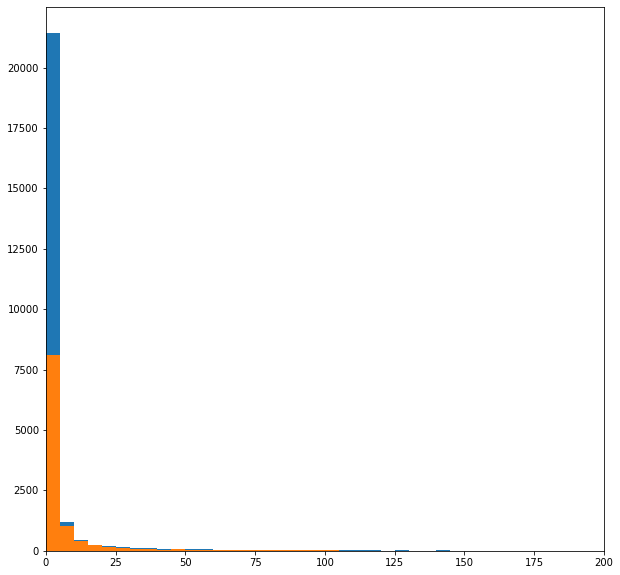

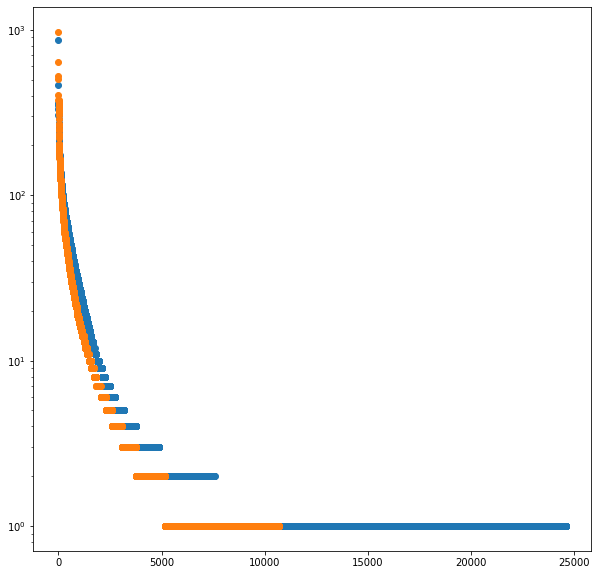

In [144]:
quick_summary(2007, 4)